## Exploring the explanatory variables
Exploring the explanatory variables
When the response variable is logical, all the points lie on y = 0, y = 1 the  and  lines, making it difficult to see what is happening. In the video, until you saw the trend line, it wasn't clear how the explanatory variable was distributed on each line. This can be solved with a histogram of the explanatory variable, grouped by the response.

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
churn = pd.read_csv('churn.csv')

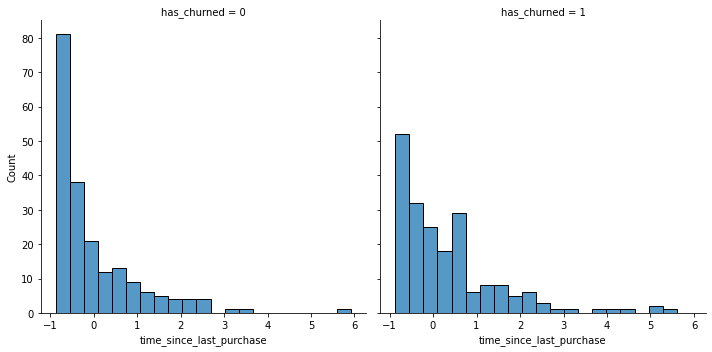

In [5]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data=churn,
            x="time_since_last_purchase",
            col="has_churned")

plt.show()

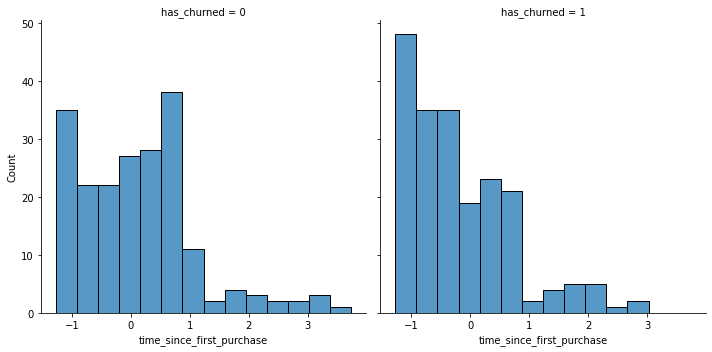

In [6]:
# Redraw the plot with time_since_first_purchase
sns.displot(data=churn,
            x="time_since_first_purchase",
            col="has_churned")

plt.show()

## Visualizing linear and logistic models
As with linear regressions, regplot() will draw model predictions for a logistic regression without you having to worry about the modeling code yourself. To see how the predictions differ for linear and logistic regressions, try drawing both trend lines side by side. 

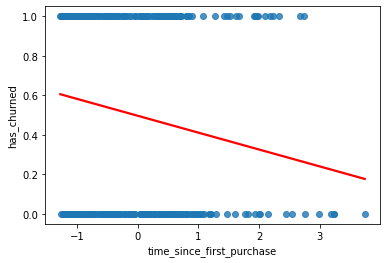

In [7]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(data=churn,
            x="time_since_first_purchase",
            y="has_churned",
            ci = None,
            line_kws={"color": "red"})

plt.show()

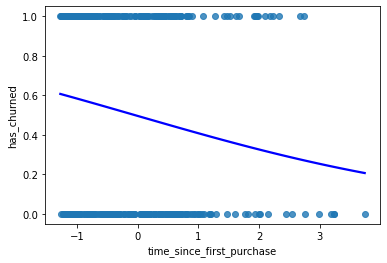

In [8]:
# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True,
            line_kws={"color": "blue"})

plt.show()

## Logistic regression with logit()
Logistic regression requires another function from statsmodels.formula.api: logit(). It takes the same arguments as ols(): a formula and data argument. We then use .fit() to fit the model to the data.

In [9]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


In [10]:
explanatory_data = pd.DataFrame({'time_since_last_purchase': np.arange(-1,6.25,0.25)})

## Calculating the confusion matrix
A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

1- True positive: The customer churned and the model predicted they would.

2- False positive: The customer didn't churn, but the model predicted they would.

3- True negative: The customer didn't churn and the model predicted they wouldn't.

4- False negative: The customer churned, but the model predicted they wouldn't.

In [12]:
# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response,
                         "predicted_response": predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


## Drawing a mosaic plot of the confusion matrix
While calculating the performance matrix might be fun, it would become tedious if you needed multiple confusion matrices of different models. Luckily, the .pred_table() method can calculate the confusion matrix for you.

Additionally, you can use the output from the .pred_table() method to visualize the confusion matrix, using the mosaic() function.

[[112.  88.]
 [ 76. 124.]]


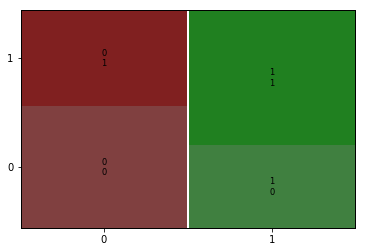

In [13]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

## Measuring logistic model performance
Several metrics exist for measuring the performance of a logistic regression model. We'll manually calculate accuracy, sensitivity, and specificity. Recall the following definitions:

Accuracy is the proportion of predictions that are correct.
 
Sensitivity is the proportion of true observations that are correctly predicted by the model as being true.
 

Specificity is the proportion of false observations that are correctly predicted by the model as being false.


In [14]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
